In [2]:
#Import All requried Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
from textblob import TextBlob
import sys
import numpy as np
import os
import nltk
import re
import string 
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import json

## Convert JSONL to CSV and Read to Dataframe

In [4]:
!pip install twarc
!twarc2 configure

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

👋  Hi I don't see a configuration file yet, so let's make one.

Please follow these steps:

1. visit https://developer.twitter.com/en/portal/
2. create a project and an app
3. go to your Keys and Tokens and generate your keys

Please enter your Bearer Token (leave blank to skip to API key configuration): AAAAAAAAAAAAAAAAAAAAACw4ggEAAAAA2YFNSkfWktRHh8e6MKQlbb9KjkE%3DcgrwE7AYAODiMViOTooQmQn8CEUF754XfBO9b9MLa7QotrZkjy
(Optional) Add API keys and secrets for user mode authentication [y or n]? n

Your keys have been written to /root/.config/twarc/config


✨ ✨ ✨  Happy twarcing! ✨ ✨ ✨



In [9]:
#Convert JSONL to CSV
!pip3 install --upgrade twarc-csv
!twarc2 csv /content/drive/MyDrive/ColabNotebooks/ukraine_stream_big.jsonl /content/drive/MyDrive/ColabNotebooks/ukrain_stream.csv 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 3.95G/3.95G [07:48<00:00, 9.05MB/s]

ℹ️
Parsed 494473 tweets objects from 494473 lines in the input file.
Wrote 494473 rows and output 79 columns in the CSV.



In [3]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ukrain_stream.csv', delimiter=',', low_memory=False)
data.set_index('id')

,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,author_id,in_reply_to_user_id,...,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 78
id,,,,,,,,,,,,,,,,,,,,,
1573014137533235201,1573014137533235201,NaN,1.572982e+18,NaN,NaN,NaN,NaN,NaN,1387493777955336197,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}]",2022-09-22T18:19:33+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN
1573014137688723456,1572585751652757507,1.572586e+18,NaN,NaN,NaN,NaN,NaN,NaN,718781298,1.621950e+07,...,NaN,NaN,NaN,NaN,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i...",2022-09-22T18:19:33+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN
1573014135813595137,1573003265150795776,1.573003e+18,NaN,NaN,NaN,NaN,NaN,NaN,1516126340008878082,1.516039e+18,...,NaN,NaN,NaN,NaN,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i...",2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN
1573014135776104448,1573014135776104448,NaN,1.573007e+18,NaN,NaN,NaN,NaN,NaN,702412861042196480,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{""id"": ""1572745850035802112"", ""tag"": """"}]",2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN
1573014138183352323,1573014138183352323,NaN,1.572972e+18,NaN,NaN,NaN,NaN,NaN,41108484,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i...",2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573086985706786817,1573086985706786817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,838619254530408449,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{""id"": ""1572745924216254464"", ""tag"": """"}, {""i...",2022-09-22T23:09:01+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN
1573086982737395712,1572763455412633600,1.572763e+18,NaN,NaN,NaN,NaN,NaN,NaN,162518255,1.403357e+18,...,NaN,NaN,NaN,NaN,NaN,"[{""id"": ""1572745850035802112"", ""tag"": """"}]",2022-09-22T23:09:02+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN
1573086984821768193,1573086984821768193,NaN,1.572985e+18,NaN,NaN,NaN,NaN,NaN,1085683407844265984,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{""id"": ""1572745924216254464"", ""tag"": """"}]",2022-09-22T23:09:02+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN


In [4]:
data.describe()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,author_id,...,attachments.poll.id,author.id,author.pinned_tweet_id,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.withheld.scope,author.withheld.copyright,Unnamed: 78
count,4.944730e+05,4.944730e+05,1.580020e+05,2.784710e+05,2.663300e+04,0.0,0.0,0.0,0.0,4.944730e+05,...,2.860000e+02,4.944730e+05,1.690960e+05,4.944730e+05,4.944730e+05,494473.000000,4.944730e+05,0.0,0.0,0.0
mean,1.573048e+18,1.572437e+18,1.571898e+18,1.572277e+18,1.569999e+18,NaN,NaN,NaN,NaN,7.465037e+17,...,1.572512e+18,7.465037e+17,1.421178e+18,9.004438e+03,1.573496e+03,57.673562,5.245461e+04,NaN,NaN,NaN
std,2.179486e+13,1.377869e+16,1.713641e+16,1.334642e+16,3.338001e+16,NaN,NaN,NaN,NaN,6.681442e+17,...,4.636113e+15,6.681442e+17,2.153276e+17,3.577419e+05,5.632454e+03,1350.976532,1.307514e+05,NaN,NaN,NaN
min,1.571541e+18,1.784982e+10,1.784982e+10,1.612633e+09,4.105758e+17,NaN,NaN,NaN,NaN,5.090000e+02,...,1.517463e+18,5.090000e+02,1.769513e+07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
25%,1.573030e+18,1.573017e+18,1.572907e+18,1.572870e+18,1.572859e+18,NaN,NaN,NaN,NaN,7.618130e+08,...,1.572884e+18,7.618130e+08,1.368743e+18,5.900000e+01,1.490000e+02,0.000000,2.568000e+03,NaN,NaN,NaN
50%,1.573047e+18,1.573037e+18,1.573008e+18,1.572981e+18,1.572972e+18,NaN,NaN,NaN,NaN,9.168221e+17,...,1.573001e+18,9.168221e+17,1.512672e+18,2.850000e+02,5.140000e+02,1.000000,1.208600e+04,NaN,NaN,NaN
75%,1.573064e+18,1.573058e+18,1.573038e+18,1.573025e+18,1.573023e+18,NaN,NaN,NaN,NaN,1.437537e+18,...,1.573050e+18,1.437537e+18,1.561103e+18,1.171000e+03,1.639000e+03,7.000000,4.739400e+04,NaN,NaN,NaN
max,1.573087e+18,1.573087e+18,1.573087e+18,1.573087e+18,1.573087e+18,NaN,NaN,NaN,NaN,1.573086e+18,...,1.573086e+18,1.573086e+18,1.573086e+18,1.066032e+08,1.081764e+06,217345.000000,9.162539e+06,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494473 entries, 0 to 494472
Data columns (total 79 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     494473 non-null  int64  
 1   conversation_id                        494473 non-null  int64  
 2   referenced_tweets.replied_to.id        158002 non-null  float64
 3   referenced_tweets.retweeted.id         278471 non-null  float64
 4   referenced_tweets.quoted.id            26633 non-null   float64
 5   edit_history_tweet_ids                 0 non-null       float64
 6   edit_controls.edits_remaining          0 non-null       float64
 7   edit_controls.editable_until           0 non-null       float64
 8   edit_controls.is_edit_eligible         0 non-null       float64
 9   author_id                              494473 non-null  int64  
 10  in_reply_to_user_id                    160259 non-null  

## Sentiment Analysis on TOP 5 Communities

In [11]:
#ECG
pd_parts = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ECG.csv')
top_5_groups_ids = pd_parts["partition"].value_counts().rename_axis('unique_values').reset_index(name='counts')["unique_values"][1:6].values.tolist()

#Finding top 5 groups
groups = dict()
for partition in top_5_groups_ids:
    groups[partition] = pd_parts.loc[pd_parts["partition"] == partition]["vertex"].values.tolist()


In [13]:
#Fetching tweets for top 5 groups in ECG
tweets_map = dict()
for key, group in groups.items():
    tweets_map[key] = data.loc[data["author.username"].isin(group)][["id", "text", "retweeted_user_id", "author.username"]]
tweets_map

{495:                          id  \
 36      1573014142755250182   
 62      1573014149562515456   
 78      1573014145548840960   
 103     1573014155694845952   
 138     1573014156906995713   
 ...                     ...   
 494352  1573086960809377794   
 494371  1573086966832570368   
 494374  1573086965267939328   
 494408  1573086973899976704   
 494450  1573086983874027521   
 
                                                      text  retweeted_user_id  \
 36      @ValerioDiPietr2 @bordoni_russia perché non es...                NaN   
 62      Gli USA hanno bocciato il referendum sull’indi...       1.391170e+18   
 78      In diretta #Rai1 le solite ciglionate del Gius...                NaN   
 103     @CottarelliCPI Eh, bravo il cottarelli ...è  d...                NaN   
 138                      @lucianocapone Si, ma sti cazzi?                NaN   
 ...                                                   ...                ...   
 494352  @DomaniGiornale Purtroppo questo 

In [16]:
#Top 5 groups from ECG
for i in groups:
  print(i)

495
138
205
326
207


In [26]:
#Saving all the tweets in top 5 groups to variables
Group_495 = tweets_map[495]
Group_138 = tweets_map[138]
Group_205 = tweets_map[205]
Group_326 = tweets_map[326]
Group_207 = tweets_map[207]


## Sentiment Analysis using SentiWordNet Sentiment Analysis

In [32]:
#CLEAN TWEETS for all groups

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets


Group_495['text'] = clean_tweets(Group_495['text'])
Group_138['text'] = clean_tweets(Group_138['text'])
Group_205['text'] = clean_tweets(Group_205['text'])
Group_326['text'] = clean_tweets(Group_326['text'])
Group_207['text'] = clean_tweets(Group_207['text'])



In [49]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

#Function to ensure input is string
def ensureIsString(input, autoTrim = True):
  if input is None:
    return ""
  elif isinstance(input, str) == False:
    input = str(input)

  if autoTrim:
    input = input.strip()

  return input

#Function to tokenize
def wordTokeniseSingleParagraph(paragraph, applyLowerCase=True):  
  if paragraph is None:
    return []
  elif isinstance(paragraph, str) == False:
    return [ str(paragraph) ]

  if applyLowerCase:
    paragraph = paragraph.lower()
  return word_tokenize(paragraph)

# For a given text block for POS Tags for each word in User Comments
def createPosTagsForText(textValue):
    textValue = ensureIsString(textValue)        
    wordTokens = wordTokeniseSingleParagraph(textValue)

    # position tagging 
    return nltk.pos_tag(wordTokens)

# For a dataframe, create a new column containing all the words and POS Tags for a given input text column
def createPosTagsColForDataFrame(dfInput, sourceCol, posTagCol):
    dfInput[posTagCol] = dfInput.apply(lambda x: createPosTagsForText(x[sourceCol]), axis=1)
    return dfInput


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [52]:
# Creating POS Tags for user tweets
Group_495 = createPosTagsColForDataFrame(Group_495, "text", "UserTweetPosTags")
Group_138 = createPosTagsColForDataFrame(Group_138, "text", "UserTweetPosTags")
Group_205 = createPosTagsColForDataFrame(Group_205, "text", "UserTweetPosTags")
Group_326 = createPosTagsColForDataFrame(Group_326, "text", "UserTweetPosTags")
Group_207 = createPosTagsColForDataFrame(Group_207, "text", "UserTweetPosTags")


In [56]:

# Convert between the PennTreebank tags to simple Wordnet tags
def pennToWn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


#Function to get Sentiment Scores
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

def getSentiment(lemmatizer, word, tag):
    wn_tag = pennToWn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset instances are the groupings of synonymous words that express the same concept. 
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]  

In [60]:
#GROUP 495
# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('sentiwordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in Group_495['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

Group_495['PositiveScore'] = positiveScore
Group_495['NegativeScore'] = negativeScore
Group_495['ObjectiveScore'] = objectiveScore
Group_495['SentiScore'] = sentiScore
Group_495['SentiPositive'] = Group_495['SentiScore'] > 0

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [63]:
#GROUP 138
# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in Group_138['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

Group_138['PositiveScore'] = positiveScore
Group_138['NegativeScore'] = negativeScore
Group_138['ObjectiveScore'] = objectiveScore
Group_138['SentiScore'] = sentiScore
Group_138['SentiPositive'] = Group_138['SentiScore'] > 0

In [64]:
#GROUP 205
# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in Group_205['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

Group_205['PositiveScore'] = positiveScore
Group_205['NegativeScore'] = negativeScore
Group_205['ObjectiveScore'] = objectiveScore
Group_205['SentiScore'] = sentiScore
Group_205['SentiPositive'] = Group_205['SentiScore'] > 0

In [65]:
#GROUP 326
# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in Group_326['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

Group_326['PositiveScore'] = positiveScore
Group_326['NegativeScore'] = negativeScore
Group_326['ObjectiveScore'] = objectiveScore
Group_326['SentiScore'] = sentiScore
Group_326['SentiPositive'] = Group_326['SentiScore'] > 0

In [66]:
#GROUP 207
# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in Group_207['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

Group_207['PositiveScore'] = positiveScore
Group_207['NegativeScore'] = negativeScore
Group_207['ObjectiveScore'] = objectiveScore
Group_207['SentiScore'] = sentiScore
Group_207['SentiPositive'] = Group_207['SentiScore'] > 0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'SentiScores for GROUP 495')]

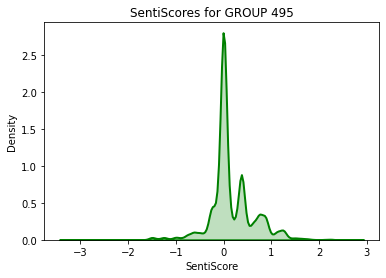

In [86]:
import seaborn as sns
sns.distplot(Group_495["SentiScore"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for GROUP 495')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'SentiScores for GROUP 138')]

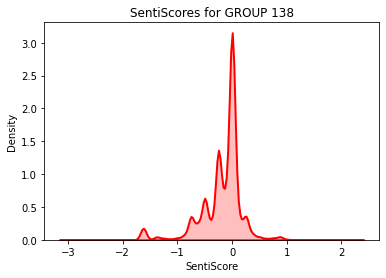

In [85]:
sns.distplot(Group_138["SentiScore"], hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for GROUP 138')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'SentiScores for GROUP 205')]

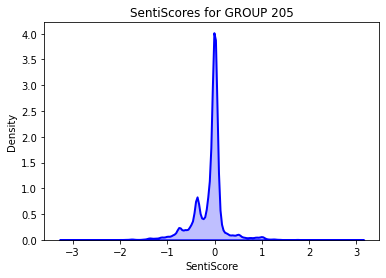

In [84]:
sns.distplot(Group_205["SentiScore"], hist=False, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for GROUP 205')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'SentiScores for GROUP 326')]

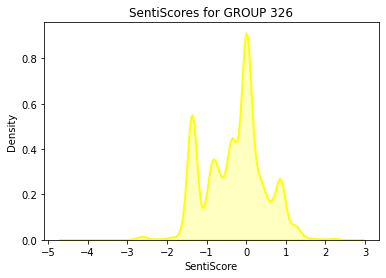

In [83]:
sns.distplot(Group_326["SentiScore"], hist=False, kde=True, 
             bins=int(180/5), color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for GROUP 326')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'SentiScores for GROUP 207')]

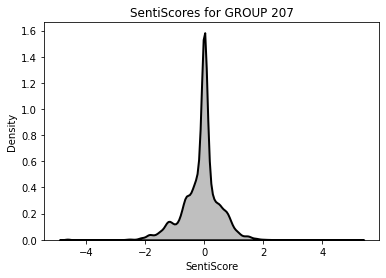

In [82]:
sns.distplot(Group_207["SentiScore"], hist=False, kde=True, 
             bins=int(180/5), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for GROUP 207')

In [155]:
# create a list of our conditions
conditions = [
    (Group_495['SentiScore'] < 0),
    (Group_495['SentiScore'] == 0),
    (Group_495['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
Group_495['Category'] = np.select(conditions, values)

In [156]:
# create a list of our conditions
conditions = [
    (Group_326['SentiScore'] < 0),
    (Group_326['SentiScore'] == 0),
    (Group_326['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
Group_326['Category'] = np.select(conditions, values)

In [157]:
# create a list of our conditions
conditions = [
    (Group_207['SentiScore'] < 0),
    (Group_207['SentiScore'] == 0),
    (Group_207['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
Group_207['Category'] = np.select(conditions, values)

In [158]:
# create a list of our conditions
conditions = [
    (Group_205['SentiScore'] < 0),
    (Group_205['SentiScore'] == 0),
    (Group_205['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
Group_205['Category'] = np.select(conditions, values)

In [159]:
# create a list of our conditions
conditions = [
    (Group_138['SentiScore'] < 0),
    (Group_138['SentiScore'] == 0),
    (Group_138['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
Group_138['Category'] = np.select(conditions, values)

In [160]:
pd.DataFrame(Group_138.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,10296,47.642404
Neutral,8878,41.080931
Positive,2437,11.276665


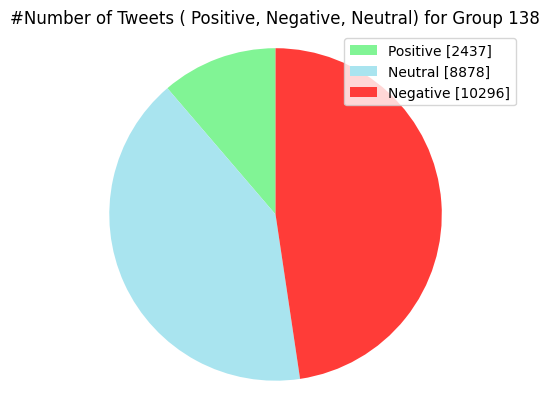

In [184]:
positive=2437
neutral=8878
negative=10296

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for Group 138' )
plt.axis('equal')
plt.show()

In [161]:
pd.DataFrame(Group_205.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,8000,36.878256
Neutral,11485,52.943346
Positive,2208,10.178399


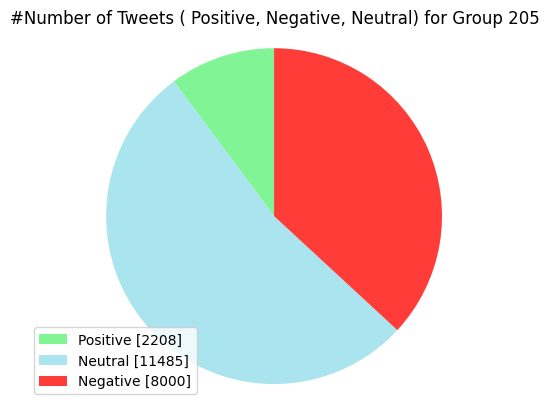

In [183]:
positive=2208
neutral=11485
negative=8000

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for Group 205' )
plt.axis('equal')
plt.show()

In [162]:
pd.DataFrame(Group_207.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,6280,39.709137
Neutral,5038,31.855833
Positive,4497,28.435030


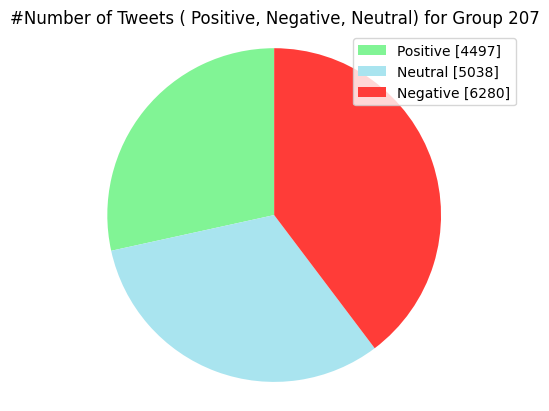

In [182]:
positive=4497
neutral=5038
negative=6280

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for Group 207' )
plt.axis('equal')
plt.show()

In [163]:
pd.DataFrame(Group_326.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,6687,52.266688
Neutral,2662,20.806628
Positive,3445,26.926684


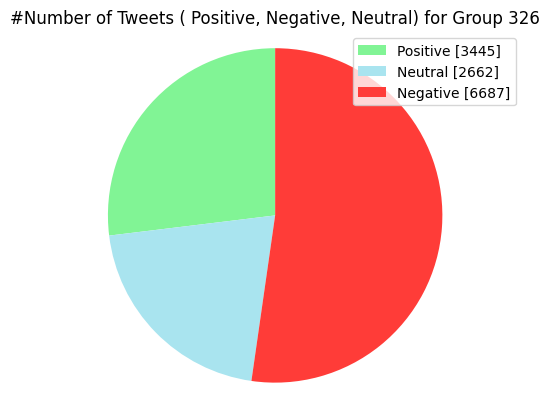

In [181]:
positive=3445
neutral=2662
negative=6687

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for Group 326' )
plt.axis('equal')
plt.show()

In [164]:
pd.DataFrame(Group_495.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,4228,18.043701
Neutral,10121,43.193069
Positive,9083,38.763230


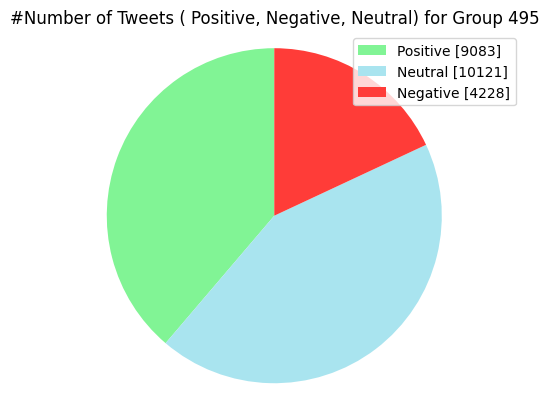

In [180]:
positive=9083
neutral=10121
negative=4228

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for Group 495' )
plt.axis('equal')
plt.show()

## Sentiment Analysis by Country

In [88]:
#Discard all columns where location is NaN
data = data[data['author.location'].notna()]

In [115]:
data['author.location'].value_counts()[:7].index.tolist()

['United States',
 'London, England',
 'France',
 'Ukraine',
 'London',
 'USA',
 'United Kingdom']

In [127]:
#Filter accorfing to Country
data_USA =data[data['author.location'].isin(['United States','USA'])]
data_London = data[data['author.location'].isin(['London, England','London','United Kingdom'])]
data_France = data[data['author.location']=='France']
data_Ukraine = data[data['author.location']=='Ukraine']
data_Australia = data[data['author.location']=='Australia']



In [ ]:
#Clean Tweets
data_USA['text'] = clean_tweets(data_USA['text'])
data_London['text'] = clean_tweets(data_London['text'])
data_France['text'] = clean_tweets(data_France['text'])
data_Ukraine['text'] = clean_tweets(data_Ukraine['text'])
data_Australia['text'] = clean_tweets(data_Australia['text'])


In [ ]:
data_USA = createPosTagsColForDataFrame(data_USA, "text", "UserTweetPosTags")
data_London = createPosTagsColForDataFrame(data_London, "text", "UserTweetPosTags")
data_France = createPosTagsColForDataFrame(data_France, "text", "UserTweetPosTags")
data_Ukraine = createPosTagsColForDataFrame(data_Ukraine, "text", "UserTweetPosTags")
data_Australia = createPosTagsColForDataFrame(data_Australia, "text", "UserTweetPosTags")

In [ ]:
#Sentiment Scores for USA

# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in data_USA['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

data_USA['PositiveScore'] = positiveScore
data_USA['NegativeScore'] = negativeScore
data_USA['ObjectiveScore'] = objectiveScore
data_USA['SentiScore'] = sentiScore
data_USA['SentiPositive'] = data_USA['SentiScore'] > 0

In [ ]:
#Sentiment Scores for UK

# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in data_London['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

data_London['PositiveScore'] = positiveScore
data_London['NegativeScore'] = negativeScore
data_London['ObjectiveScore'] = objectiveScore
data_London['SentiScore'] = sentiScore
data_London['SentiPositive'] = data_London['SentiScore'] > 0

In [ ]:
#Sentiment Scores for France

# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in data_France['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

data_France['PositiveScore'] = positiveScore
data_France['NegativeScore'] = negativeScore
data_France['ObjectiveScore'] = objectiveScore
data_France['SentiScore'] = sentiScore
data_France['SentiPositive'] = data_France['SentiScore'] > 0

In [ ]:
#Sentiment Scores for Ukraine

# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in data_Ukraine['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

data_Ukraine['PositiveScore'] = positiveScore
data_Ukraine['NegativeScore'] = negativeScore
data_Ukraine['ObjectiveScore'] = objectiveScore
data_Ukraine['SentiScore'] = sentiScore
data_Ukraine['SentiPositive'] = data_Ukraine['SentiScore'] > 0

In [138]:
#Sentiment Scores for Australia

# For the User tweets, apply SentiWordNet Sentiment Analysis to get Positive, Negative and Objective Score. 
# Then also, get the Aggregated "SentiScore", which is just the aggregation of the Positive and Negative Score
lemmatizer = WordNetLemmatizer()
positiveScore = []
negativeScore = []
objectiveScore = []
sentiScore = []

for pos_val in data_Australia['UserTweetPosTags']:    
    pos = 0
    neg = 0
    obj = 0
    senti_val = [getSentiment(lemmatizer, x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  
            neg = neg + score[2]  
            obj = obj + score[3]  
        except:
            continue

    if pos is None:
        positiveScore.append(0)
    else:
        positiveScore.append(pos)    

    if neg is None:
        negativeScore.append(0)
    else:
        negativeScore.append(neg)      
                   
    if obj is None:
        objectiveScore.append(0)
    else:
        objectiveScore.append(obj)   

    if pos is None or neg is None:
        sentiScore.append(0)
    else:
        sentiScore.append(pos - neg)
    

data_Australia['PositiveScore'] = positiveScore
data_Australia['NegativeScore'] = negativeScore
data_Australia['ObjectiveScore'] = objectiveScore
data_Australia['SentiScore'] = sentiScore
data_Australia['SentiPositive'] = data_Australia['SentiScore'] > 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

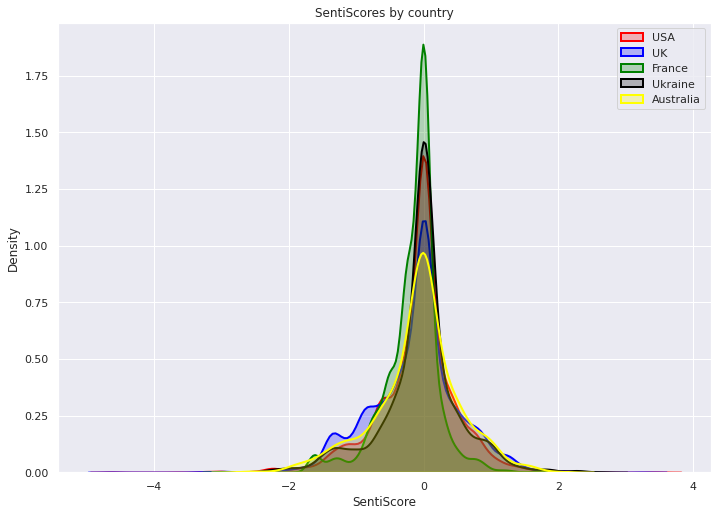

In [144]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_USA["SentiScore"], hist=False, kde=True, label = 'USA',
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for USA')

sns.distplot(data_London["SentiScore"], hist=False, kde=True, label = 'UK',
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for UK')

sns.distplot(data_France["SentiScore"], hist=False, kde=True, label = 'France',
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for France')

sns.distplot(data_Ukraine["SentiScore"], hist=False, kde=True, label = 'Ukraine',
             bins=int(180/5), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores for Ukraine')

sns.distplot(data_Australia["SentiScore"], hist=False, kde=True, label = 'Australia',
             bins=int(180/5), color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2}).set(title='SentiScores by country')
          
plt.legend()
plt.show()


In [ ]:
# create a list of our conditions
conditions = [
    (data_USA['SentiScore'] < 0),
    (data_USA['SentiScore'] == 0),
    (data_USA['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_USA['Category'] = np.select(conditions, values)

In [ ]:
# create a list of our conditions
conditions = [
    (data_London['SentiScore'] < 0),
    (data_London['SentiScore'] == 0),
    (data_London['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_London['Category'] = np.select(conditions, values)

In [ ]:
# create a list of our conditions
conditions = [
    (data_France['SentiScore'] < 0),
    (data_France['SentiScore'] == 0),
    (data_France['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_France['Category'] = np.select(conditions, values)

In [150]:
# create a list of our conditions
conditions = [
    (data_Ukraine['SentiScore'] < 0),
    (data_Ukraine['SentiScore'] == 0),
    (data_Ukraine['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_Ukraine['Category'] = np.select(conditions, values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# create a list of our conditions
conditions = [
    (data_Australia['SentiScore'] < 0),
    (data_Australia['SentiScore'] == 0),
    (data_Australia['SentiScore'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data_Australia['Category'] = np.select(conditions, values)

In [151]:
pd.DataFrame(data_USA.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,2344,39.897872
Neutral,1748,29.753191
Positive,1783,30.348936


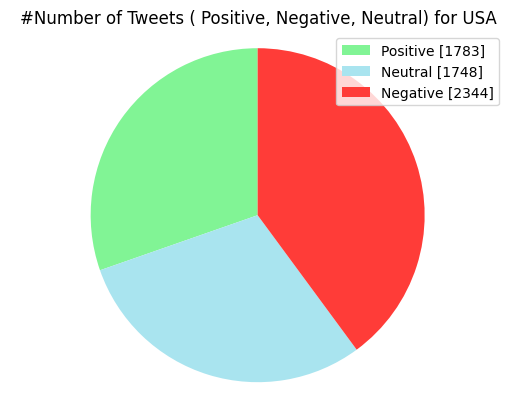

In [179]:
positive=1783
neutral=1748
negative=2344

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for USA' )
plt.axis('equal')
plt.show()

In [152]:
pd.DataFrame(data_London.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,2451,43.838312
Neutral,1412,25.254874
Positive,1728,30.906815


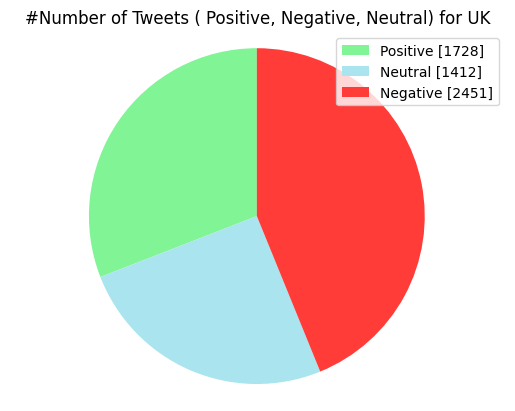

In [178]:
positive=1728
neutral=1412
negative=2451

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for UK' )
plt.axis('equal')
plt.show()

In [153]:
pd.DataFrame(data_France.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,990,46.698113
Neutral,827,39.009434
Positive,303,14.292453


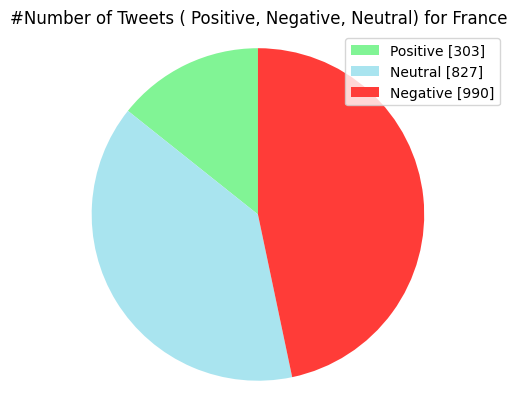

In [177]:
positive=303
neutral=827
negative=990

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for France' )
plt.axis('equal')
plt.show()

In [154]:
pd.DataFrame(data_Ukraine.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,569,31.734523
Neutral,703,39.208031
Positive,521,29.057446


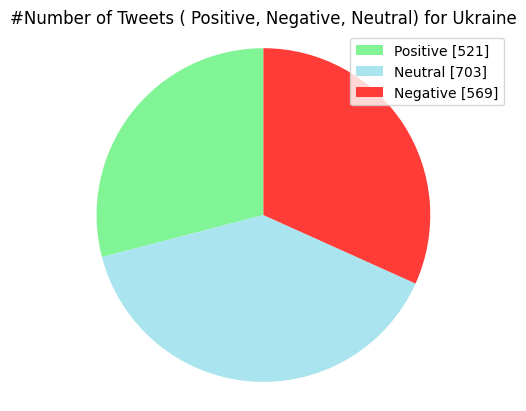

In [176]:
positive=521
neutral=703
negative=569

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for Ukraine' )
plt.axis('equal')
plt.show()

In [146]:
pd.DataFrame(data_Australia.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Category,,
Negative,263,41.158059
Neutral,176,27.543036
Positive,200,31.298905


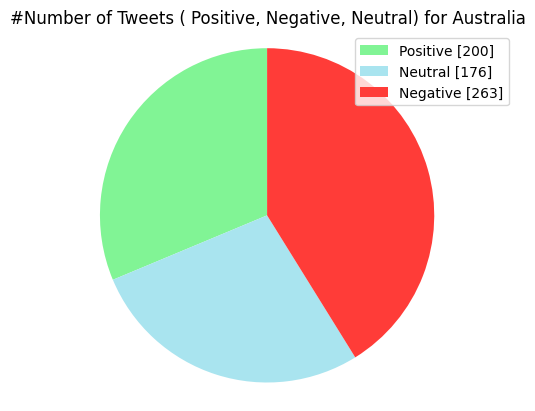

In [175]:
positive=200
neutral=176
negative=263

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral) for Australia' )
plt.axis('equal')
plt.show()